# Image classifier
This notebook has been created to practice lesson two of Practical Deep Learning for Coders available on https://course.fast.ai/. Thanks to Jeremy Howard for this amazing course!

## What are we going to make?
At the end of this notebook we are going to have a model that can classify kitchen appliances such as washing machine, dishwasher, gas range.

First, let's import what we need.

In [9]:
from fastai.vision import *

## Preparing data
### Making directories
First, let's make appropriate directories to download and save images of each class.

In [10]:
classes = ['washing-machine','dishwasher', 'gas-range']
path = Path('data/homeAppliances')
for myClass in classes:
  dest = path/myClass
  dest.mkdir(parents=True, exist_ok=True)

Let's see it worked!

In [11]:
path.ls()

[PosixPath('data/homeAppliances/washing-machine'),
 PosixPath('data/homeAppliances/dishwasher'),
 PosixPath('data/homeAppliances/gas-range')]

Now, you can search on google to find images to train your model. Search in google images and then open console and write this javaScript code to save csv file of link to images google found for you!

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Then upload these csv file on to your working directory to be able to download images in next step.

## Downloading Images

Now, we download and save images.

In [71]:
download_images('./washing-machine.csv', 'data/homeAppliances/washing-machine', max_pics=200)
download_images('./dishwasher.csv', 'data/homeAppliances/dishwasher', max_pics=200)
download_images('./gas-range.csv', 'data/homeAppliances/gas-range', max_pics=200)

In [38]:
# if you have problem downloading files try this to see exception
# download_images((csv_file_path/myClass), dest, max_pics=20, max_workers=0)

Let's remove images that cannot be opened.

In [72]:
classes = ['washing-machine','dishwasher', 'gas-range']
path = Path('data/homeAppliances')
for myClass in classes:
  dest = path/myClass
  print(myClass)
  verify_images(dest, delete=True, max_size=500)

washing-machine


dishwasher


gas-range


## View data

We need to have a data for trainig and validation. So, let's partition our data.

Note: Although we have random validation data, we should make sure we always get the same validation data to be able to compare different trained model.

In [73]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [74]:
data.classes

['dishwasher', 'gas-range', 'washing-machine']

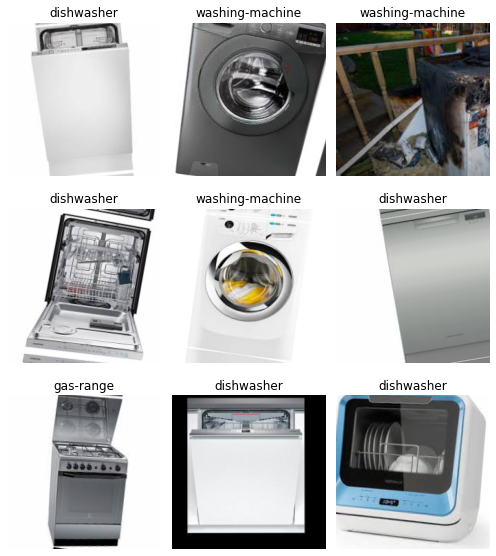

In [78]:
data.show_batch(rows=3, figsize=(7,8))

In [79]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dishwasher', 'gas-range', 'washing-machine'], 3, 416, 104)

## Train model

In [80]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [81]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.574949,0.452622,0.153846,02:34
1,0.998023,0.120669,0.028846,02:32
2,0.680373,0.129040,0.028846,02:31
3,0.538011,0.148030,0.038462,02:32


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [82]:
learn.save('stage-1')

In [83]:
learn.unfreeze()

In [84]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


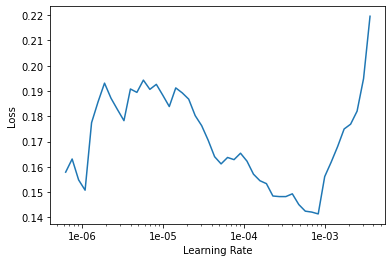

In [86]:
learn.recorder.plot()

In [87]:
learn.fit_one_cycle(2, max_lr=slice(5e-5,2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.192615,0.184240,0.048077,03:34
1,0.199726,0.178525,0.048077,03:36


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [88]:
learn.save('stage-2')

In [69]:
interp = ClassificationInterpretation.from_learner(learn)

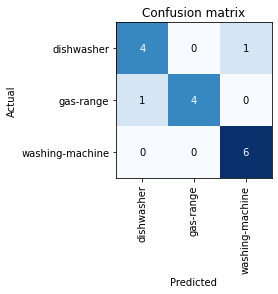

In [70]:
interp.plot_confusion_matrix()